# Building a Handwritten Digits Classifier

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Exploring the Data

In [364]:
from sklearn.datasets import load_digits

In [365]:
data = load_digits()

In [366]:
digits.keys()

RangeIndex(start=0, stop=64, step=1)

In [367]:
digits = pd.DataFrame(data['data'])

In [368]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [369]:
digits.shape

(1797, 64)

In [370]:
pd.Series(data['target']).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

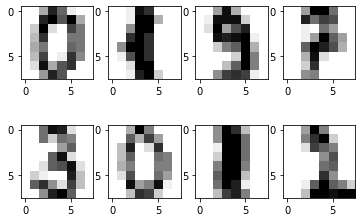

In [371]:
fig, axarr = plt.subplots(2, 4)
axarr[0, 0].imshow(digits.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(digits.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(digits.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(digits.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(digits.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(digits.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(digits.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(digits.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Classifier

In [372]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [373]:
labels= pd.Series(data['target'])

In [374]:
# train = digits.sample(frac=.8, random_state=1)
# test = digits.loc[~digits.index.isin(train.index)]
# train_target = train['target']
# test_target = test['target']
# train.drop('target', axis=1, inplace=True)

In [375]:
# test = test.drop('target', axis=1)

In [376]:
digits

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [377]:
def train_knn(neighbors, train, train_target):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train, train_target)
    return knn

def test_knn(knn, test, test_target):
    predictions = knn.predict(test)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_target
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    kf = KFold(4, shuffle=True, random_state=1)
    accuracies = []
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        accuracy = test_knn(model, test_features, test_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)

In [378]:
accuracy_vals = []
for k in range(1,11):
    accuracy_vals.append(cross_validate(k))

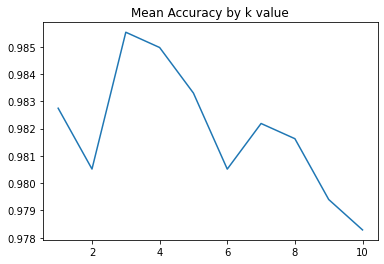

In [379]:
plt.plot(range(1,11), accuracy_vals)
plt.title('Mean Accuracy by k value')
plt.show()

In [380]:
accuracy_vals.index(max(accuracy_vals))+1

3

Above, we see that the highest accuracy was achieved when n_neighbors equals 3. However, the accuracies do not vary much by choice of k-value, as they are all within about .5 percentage points of each other. 

## Neural Network with One Hidden Layer

In [381]:
from sklearn.neural_network import MLPClassifier

In [382]:
def train_nn(neurons, train, train_target):
    nn = MLPClassifier(hidden_layer_sizes=neurons)
    nn.fit(train, train_target)
    return nn

def test_nn(nn, test, test_target):
    predictions = nn.predict(test)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_target
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def nn_cross_validate(neurons):
    kf = KFold(4, shuffle=True, random_state=1)
    accuracies = []
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        accuracy = test_nn(model, test_features, test_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)

def nn_cross_validate_compare(neurons):
    kf = KFold(4, shuffle=True, random_state=1)
    accuracies = []
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        accuracy = test_nn(model, train_features, train_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)

In [383]:
neurons_list = [(8,),(16,),(32,),(64,),(128,),(256,)]

In [384]:
accuracy_list = []
train_accuracy_list = []
for n in neurons_list:
    accuracy_list.append(nn_cross_validate(n))
    train_accuracy_list.append(nn_cross_validate_compare(n))

/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/skle

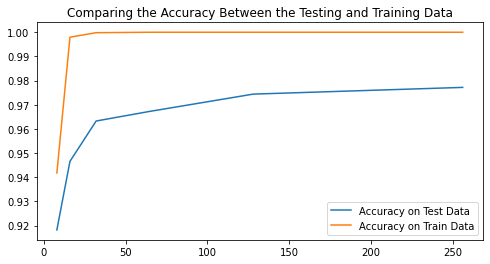

In [385]:
plt.figure(figsize=(8,4))
plt.plot([8,16,32,64,128,256], accuracy_list, label='Accuracy on Test Data')
plt.plot([8,16,32,64,128,256], train_accuracy_list, label='Accuracy on Train Data')
plt.title('Comparing the Accuracy Between the Testing and Training Data')
plt.legend()
plt.show()

Abve, we see that there is little evidence of overfitting as the model does similarly well making predictions using the testing and training data.

## Neural Network with Two Hidden Layers

In [386]:
neurons_list = [(8,8),(64,64),(128,128), (256,256)]
accuracy_list = []
train_accuracy_list = []
for n in neurons_list:
    accuracy_list.append(nn_cross_validate(n))
    train_accuracy_list.append(nn_cross_validate_compare(n))

/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/skle

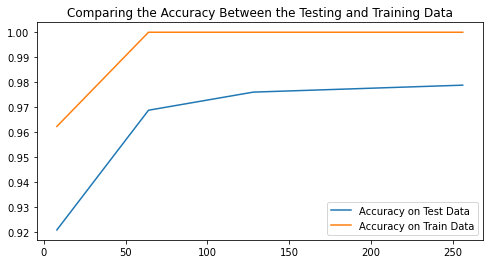

In [387]:
plt.figure(figsize=(8,4))
plt.title('Comparing the Accuracy Between the Testing and Training Data')
plt.plot([8,64,128,256], accuracy_list, label='Accuracy on Test Data')
plt.plot([8,64,128,256], train_accuracy_list, label='Accuracy on Train Data')
plt.legend()
plt.show()

In [388]:
accuracy_list

[9.209960405840139e-01,
 0.968828260331601,
 0.976066567681267,
 0.9788492947290274]

Here, we see that the model with two hidden layers is slightly more accurate than the model with one hiddenl layer, and there is minimal evidence of overfitting. 

## Neural Network with Three Hidden Layers

In [389]:
neurons_list = [(10,10,10),(64,64,64),(128,128, 128)]
accuracy_list = []
train_accuracy_list = []
for n in neurons_list:
    accuracy_list.append(nn_cross_validate(n))
    train_accuracy_list.append(nn_cross_validate_compare(n))

/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leo/anaconda3/lib/python3.9/site-packages/skle

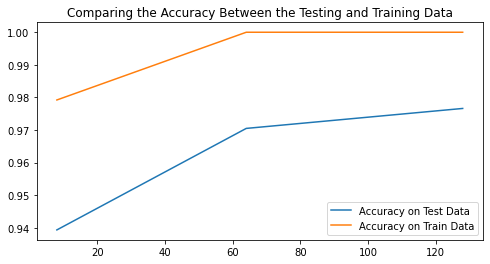

In [390]:
plt.figure(figsize=(8,4))
plt.title('Comparing the Accuracy Between the Testing and Training Data')
plt.plot([8,64,128], accuracy_list, label='Accuracy on Test Data')
plt.plot([8,64,128], train_accuracy_list, label='Accuracy on Train Data')
plt.legend()
plt.show()

In [391]:
accuracy_list

[9.393603068547389e-01, 0.9704998762682505, 0.9766221232368226]

Here we see that using three hidden layers with 128 neurons each was 97.7% accurate on the testing data. 